# Body performance data

### Progetto preliminare all'esame di Programmazione di applicazioni Data Intensive    
**A.A. 2021/2022**

**Fabio Pedrini**    
fabio.pedrini3@studio.unibo.it    
Matricola: 0000916427 

## Obiettivo del progetto:

Il progetto ha lo scopo di classificare la condizione fisica di persone di cui sono stati registrati i risultati di alcuni esercizi fisici.

### Librerie:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## Elaborazione e pulizia dei dati:
Importiamo il dataset bodyPerformance.csv da Kaggle (https://www.kaggle.com/datasets/kukuroo3/body-performance-data) e costruiamo un dataframe pandas.

In [2]:
bp = pd.read_csv("bodyPerformance.csv")
bp.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [3]:
bp.shape

(13393, 12)

Il dataframe è composto da 13393 righe (quindi 13393 persone) e 12 colonne:
- `age`: età
- `gender`: genere (M o F)
- `height_cm`: altezza (misurata in cm)
- `weight_kg`: peso (misurato in kg)
- `body fat_%`: percentuale di massa grassa
- `diastolic`: pressione sanguigna diastolica (minima)
- `systolic`: pressione sanguigna sistolica (minima)
- `gripForce`: forza muscolare massima (misurata in kg con un dinamometro)
- `sit and bend forward_cm`: lunghezza massima raggiunta allungando le braccia in avanti da seduti (misurata in cm)
- `sit-ups counts`: numero di sit-up (esercizio da seduti in cui si cerca di raggiungere le ginocchia con il petto) eseguiti in 2 minuti
- `broad jump_cm`: salto in lungo (misurato in cm)
- **`class`: classificazione della condizione fisica, incognita da determinare (A=ottima, B=buona, C=discreta, D=sufficiente)**

Le feature presenti (oltre alla variabile `class` da determinare) sono tutte **variabili continue**, escluso il genere (`gender`) che è una **variabile discreta binaria**.

Possiamo modificare l'ordine delle colonne del dataset e portare la variabile target dall'ultima alla prima colonna.

In [4]:
columns = bp.columns.to_list()
columns.insert(0, columns.pop(-1))
bp = bp.reindex(columns=columns)
bp.head(5)

,class,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,C,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,A,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,C,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,B,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,B,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


Verifichiamo se sono presenti colonne con valori nulli:

In [5]:
bp.isna().sum()

class                      0
age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
dtype: int64

Non sono presenti valori nulli, ma potrebbero essere presenti valori senza significato. Dalla funzione `bp.describe()` ricaviamo informazioni fondamentali per la comprensione dei dati e per trovare eventuali errori.

In [6]:
bp.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


Notiamo che il valore massimo di allungamento delle braccia da seduti (colonna: `sit and bend forward_cm`) è di 213 cm ed è un valore esageratamente alto. Verifichiamo se esistono atleti con allungamento maggiore della loro altezza e li rimuoviamo dal dataset.

In [7]:
bp[bp["sit and bend forward_cm"] >= bp["height_cm"]]

,class,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
2657,B,33.0,M,165.6,60.4,17.8,81.0,127.0,38.6,213.0,53.0,244.0
3355,A,45.0,M,164.4,64.4,24.3,96.0,142.0,38.5,185.0,44.0,223.0


Creiamo un set contenente gli indici delle righe da rimuovere, in modo tale da effettuare la `drop` una volta sola.

In [8]:
indexes = bp[bp["sit and bend forward_cm"] >= bp["height_cm"]].index
indici = set(indexes)

Inoltre, è necessario verificare che la pressione sanguigna diastolica sia minore di quella sistolica, dato che non può accadere il contrario.

In [9]:
for i in bp[bp["diastolic"] >= bp["systolic"]].index:
    indici.add(i)

Si procede rimuovendo altri valori errati semanticamente o estremi:      
- Rimuoviamo pressioni minime e massime rispettivamente inferiori a 40 e 70.

In [10]:
for i in bp[bp["diastolic"] <= 40].index:
    indici.add(i)
    
for i in bp[bp["systolic"] <= 70].index:
    indici.add(i)

- Rimuoviamo pesi inferiori a 40 kg

In [11]:
for i in bp[bp["weight_kg"] < 40].index: 
    indici.add(i)

- Rimuoviamo altezze minori di 130 cm

In [12]:
for i in bp[bp["height_cm"] < 130].index:
    indici.add(i)

- Rimuoviamo un caso particolare in cui un uomo possedeva una percentuale di massa grassa elevatissima nonostante altezza e peso nella media

In [13]:
for i in bp[bp["body fat_%"] >= 70].index:  
    indici.add(i)                           

In [14]:
bp.drop(index=indici, inplace=True)
print(indici)

{10624, 6786, 7944, 4370, 12949, 8217, 3355, 1182, 2216, 7597, 8622, 12207, 10295, 10552, 1081, 8251, 8131, 3524, 7495, 2891, 336, 6488, 344, 6234, 216, 12637, 735, 2657, 8422, 11623, 12023, 9595, 7550}


Possiamo, inoltre, introdurre una nuova feature (colonna nel dataFrame) che denomineremo **`bmi`** e indica l'indice di massa corporeo, calcolato come rapporto fra peso e altezza al quadrato. Muoviamo la colonna appena creata dall'ultima alla seconda posizione.

In [15]:
bp['bmi'] = (bp["weight_kg"] / (bp["height_cm"] / 100)**2)
columns = bp.columns.to_list()
columns.insert(1, columns.pop(-1))
bp = bp.reindex(columns=columns)
bp.head(5)

,class,bmi,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,C,25.344179,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,A,20.495868,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,C,24.181428,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,B,23.349562,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,B,22.412439,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


Come ultima modifica, convertiamo i valori della feature `gender` e della variabile `class` in valori numerici interi. Rappresentiamo il genere come **M=1** e **F=0** mentre le classi come **A=3**, **B=2**, **C=1** e **D=0**.

In [16]:
bp['gender'].replace(['M','F'], [1,0], inplace=True)
bp['class'].replace(['A', 'B', 'C', 'D'], [3, 2, 1, 0], inplace=True)
print(bp["gender"][0], bp["class"][0])

1 1


In [17]:
bp.describe()

,class,bmi,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13360.000000,13360.000000,13360.00000,13360.000000,13360.000000,13360.000000,13360.000000,13360.000000,13360.000000,13360.000000,13360.000000,13360.000000,13360.000000
mean,1.499626,23.617957,36.76976,0.632859,168.583166,67.494840,23.234785,78.826025,130.281512,36.984612,15.177368,39.788024,190.197013
std,1.117741,2.925964,13.62331,0.482043,8.404938,11.899545,7.238381,10.641283,14.610066,10.608950,8.152600,14.263251,39.805025
min,0.000000,15.078359,21.00000,0.000000,139.500000,40.000000,3.000000,41.000000,82.000000,0.000000,-25.000000,0.000000,0.000000
25%,1.000000,21.618473,25.00000,0.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,1.000000,23.467274,32.00000,1.000000,169.200000,67.500000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,2.000000,25.343033,48.00000,1.000000,174.800000,75.370000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,3.000000,42.906509,64.00000,1.000000,193.800000,138.100000,54.900000,126.000000,201.000000,70.500000,42.000000,80.000000,303.000000


## Analisi dei dati
Per prima cosa, verifichiamo la distribuzione delle classi all'interno del dataset.

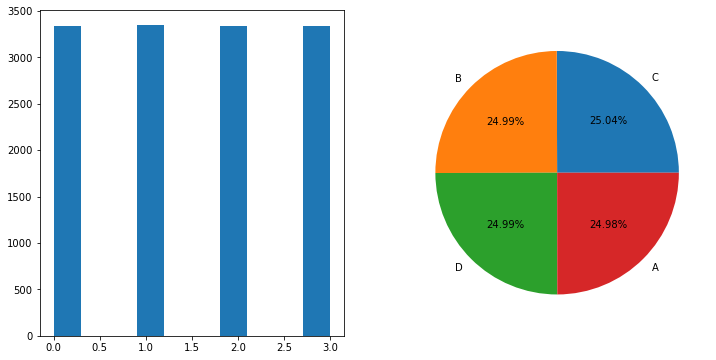

1    3346
2    3339
0    3338
3    3337
Name: class, dtype: int64


In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1).hist(bp["class"])
plt.subplot(1, 2, 2)
values = bp["class"].value_counts()
label_map = {3: "A", 2: "B", 1: "C", 0:"D"}
plt.pie(values, labels=values.index.map(label_map), autopct="%.2f%%")
plt.show()
print(values)

Come possiamo notare, gli atleti del dataset sono suddivisi equamente all'interno delle 4 classi presenti. Il problema risulta quindi essere bilanciato e non è necessario utilizzare tecniche di bilanciamento. 

Per quanto riguarda il genere, invece, gli uomini rappresentano circa il 63% degli atleti totali, mentre le donne solamente il 37% circa.

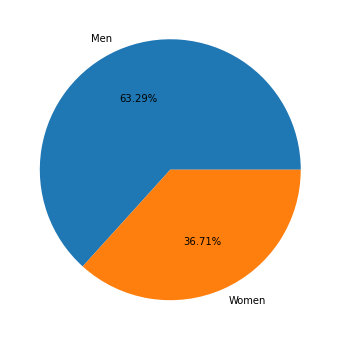

In [19]:
plt.figure(figsize=(15, 6))
plt.pie(bp["gender"].value_counts(), labels=["Men", "Women"], autopct="%.2f%%")
plt.show()

Visualizziamo la distribuzione dell'età, altezza, peso e BMI con istogrammi.

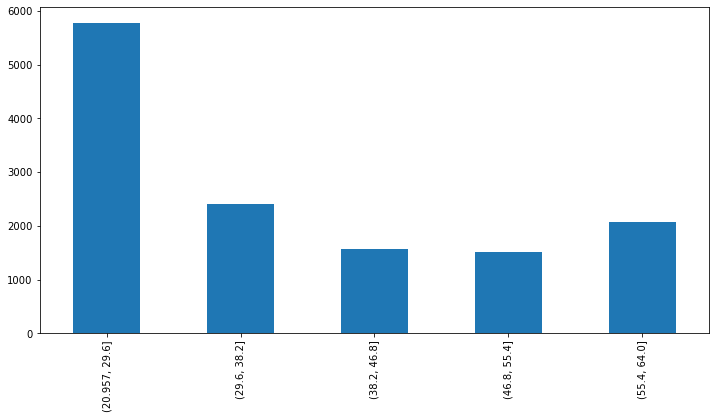

In [20]:
plt.figure(figsize=(12, 6))
pd.cut(bp["age"], bins=5).value_counts().sort_index().plot.bar()
plt.show()

Per quanto riguarda l'età, possiamo notare un'alta frequenza di ragazzi tra i 20 e i 29 anni, mentre gli altri range di età sono distribuiti abbastanza uniformemente.

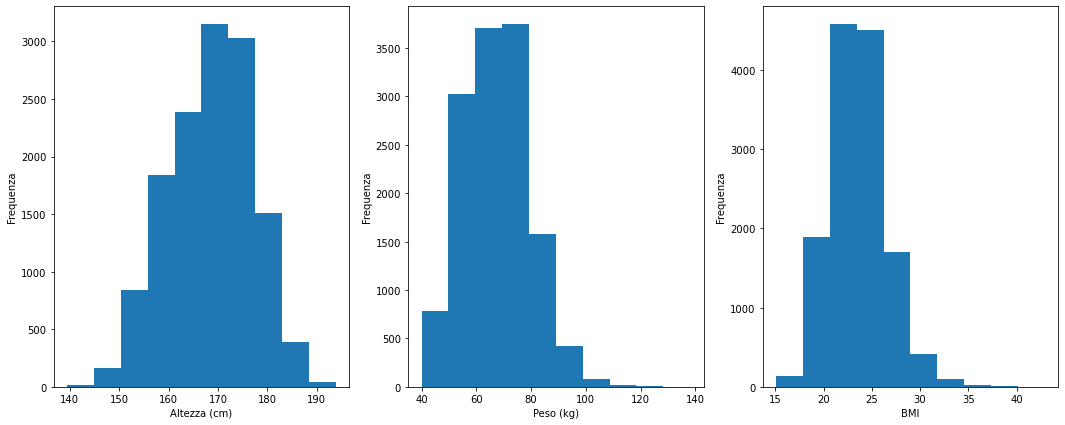

In [21]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1).hist(bp["height_cm"])
plt.ylabel('Frequenza')
plt.xlabel('Altezza (cm)')
plt.subplot(1, 3, 2).hist(bp["weight_kg"])
plt.ylabel('Frequenza')
plt.xlabel('Peso (kg)')
plt.subplot(1, 3, 3).hist(bp["bmi"])
plt.ylabel('Frequenza')
plt.xlabel('BMI')
plt.show()

Come sottolineato dai grafici, i valori di altezza, peso e BMI più frequenti sono nella media:
- **altezza** tra i 155 e i 180 cm;
- **peso** tra i 50 e gli 80 kg;
- **BMI** tra 20 e 25 (le persone sono considerate "normopeso" se possiedono un BMI compreso tra 18,5 e 25).

Rappresentiamo i risultati degli esercizi fisici con _box plot_ per sottolineare la media dei risultati e i valori estremi.   
Notiamo che nel `sit and bend forward` e nel `broad jump` sono presenti diversi valori (_outliers_) nettamente al di sotto del minimo (calcolato utilizzando i valori del primo quartile e dell'_InterQuantile Range_).

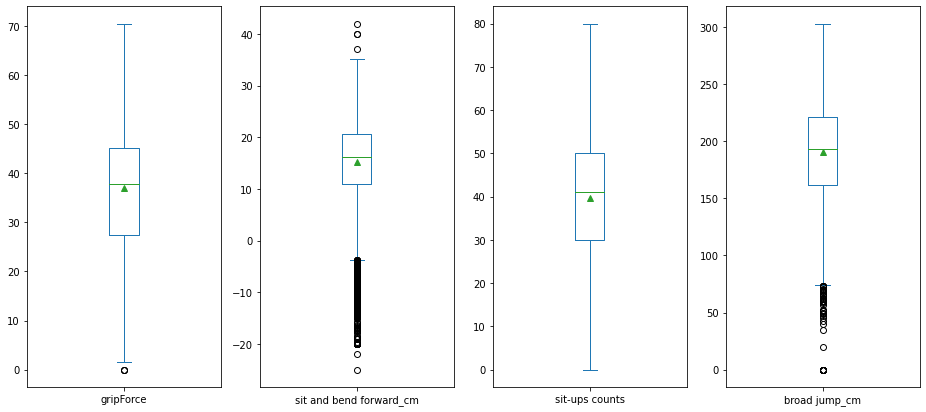

In [22]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 4, 1)
bp["gripForce"].plot.box(showmeans=True)
plt.subplot(1, 4, 2)
bp["sit and bend forward_cm"].plot.box(showmeans=True)
plt.subplot(1, 4, 3)
bp["sit-ups counts"].plot.box(showmeans=True)
plt.subplot(1, 4, 4)
bp["broad jump_cm"].plot.box(showmeans=True)
plt.show()

Verifichiamo se questi due esercizi sono determinanti nella definizione della condizione fisica dell'atleta.

<AxesSubplot:xlabel='sit and bend forward_cm', ylabel='broad jump_cm'>

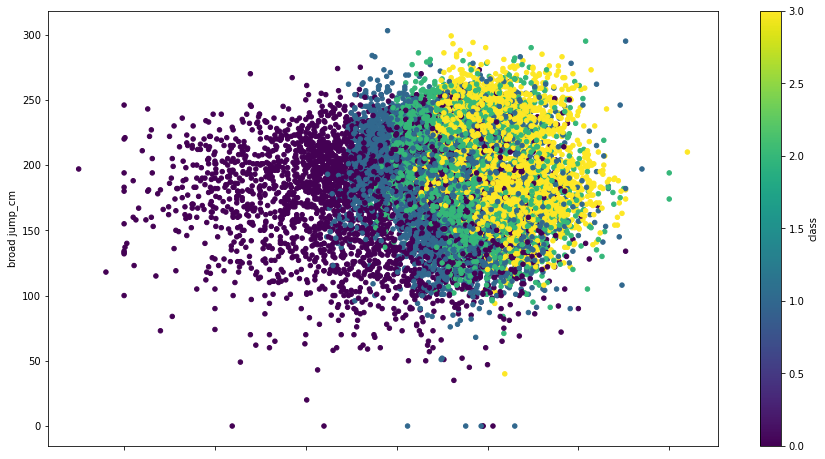

In [23]:
bp.plot.scatter("sit and bend forward_cm", "broad jump_cm",
                c="class", colormap="viridis", figsize=(15,8))

Come evidenzia il grafico, la classe di condizione fisica dell'atleta varia principalmente seguendo l'asse delle ascisse. Si può dedurre che la classe sia altamente correlata alla feature **`sit and bend forward_cm`**, più è alto il risultato dell'esercizio, più è probabile che la condizione fisica sia migliore.

Utilizzando la funzione `corr` possiamo ottenere la **correlazione** delle feature con ciascuna delle altre. In particolare, visualizziamo la correlazione delle feature con la variabile target.

In [24]:
bp.corr().iloc[0]

class                      1.000000
bmi                       -0.277046
age                       -0.065358
gender                    -0.076320
height_cm                 -0.038462
weight_kg                 -0.215613
body fat_%                -0.343360
diastolic                 -0.067247
systolic                  -0.035759
gripForce                  0.136010
sit and bend forward_cm    0.607166
sit-ups counts             0.452516
broad jump_cm              0.261535
Name: class, dtype: float64

Come osservato precedentemente, la feature **`sit and bend forward_cm`** è quella con la correlazione più alta, ma anche gli altri esercizi fisici sono importanti per la determinazione della classe. Al contrario, notiamo che feature come l'età (`age`), il genere (`gender`), l'altezza (`height_cm`) e la pressione sanguigna (`diastolic` e `systolic`) non risultino molto rilevanti. Infine, viene evidenziato come il **BMI** (nuova feature aggiunta) abbia una correlazione maggiore (in valore assoluto) di altezza e peso, quindi decidiamo di non eliminare la feature aggiunta in quanto potrebbe rivelarsi utile.

## Preprocessing dei dati

In [25]:
bp.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13360 entries, 0 to 13392
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    13360 non-null  int64  
 1   bmi                      13360 non-null  float64
 2   age                      13360 non-null  float64
 3   gender                   13360 non-null  int64  
 4   height_cm                13360 non-null  float64
 5   weight_kg                13360 non-null  float64
 6   body fat_%               13360 non-null  float64
 7   diastolic                13360 non-null  float64
 8   systolic                 13360 non-null  float64
 9   gripForce                13360 non-null  float64
 10  sit and bend forward_cm  13360 non-null  float64
 11  sit-ups counts           13360 non-null  float64
 12  broad jump_cm            13360 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 1.9 MB


Notiamo che le feature `class` e `gender` non sono state lette come categoriche, quindi le modifichiamo.

In [26]:
bp[["class"] + ["gender"]] = bp[["class"] + ["gender"]].astype("category")
bp.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13360 entries, 0 to 13392
Columns: 13 entries, class to broad jump_cm
dtypes: category(2), float64(11)
memory usage: 1.8 MB


Dato che le feature discrete sono solo due, il risparmio di memoria risulta solo di 0.1 MB.

Come prima cosa, dividiamo il dataset in **training set** e **validation set** utilizzando la funzione `train_test_split` che ci permette di impostare la grandezza dei set e un seed per la randomizzazione.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = bp.drop(columns="class")
y = bp["class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [29]:
print(X_train.shape, X_val.shape)

(8906, 12) (4454, 12)


## Algoritmi di classificazione   
In questa sezione verranno utilizzati i principali algoritmi di classificazione visti a lezione; verrà creato un vettore che conterrrà tutti i modelli in modo da poterli confrontare più facilmente alla fine.

### Perceptron

In [30]:
from sklearn.linear_model import Perceptron

Per creare un primo modello utilizziamo un semplice **Perceptron** senza standardizzazione e regolarizzazione (le quali verranno introdotte successivamente con l'utilizzo delle `Pipeline`).

In [31]:
model = Perceptron(random_state=42)
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.42860350246969015

Otteniamo un modello con una percentuale di istanze corrette del **43%** circa, è un risultato migliore della classificazione casuale (25%, dato che abbiamo 4 classi) ma è sicuramente un risultato migliorabile.

Introduciamo le Pipeline per poter applicare la **standardizzazione** utilizzando uno `StandardScaler`.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [33]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("cl", Perceptron(random_state=42))
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.48652896273013024

Otteniamo in questo modo un modello con uno score più alto di quello precedente (**~49%**) ma è comunque un risultato insoddisfacente. Tentiamo di migliorare il modello cercando il parametro **alpha** migliore per una **regolarizzazione l1**.

In [34]:
for alpha in np.logspace(-5, 0, 6):
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("cl", Perceptron(penalty="l1", alpha=alpha, random_state=42))
    ])
    model.fit(X_train, y_train)
    print("Alpha = " + str(alpha) + " Score: " + str(model.score(X_val, y_val)))

Alpha = 1e-05 Score: 0.4791198922317018
Alpha = 0.0001 Score: 0.502694207453974
Alpha = 0.001 Score: 0.4625056129321958
Alpha = 0.01 Score: 0.4357880556802874
Alpha = 0.1 Score: 0.2633587786259542
Alpha = 1.0 Score: 0.24315222272114953


Notiamo che con l'insermimento della regolarizzazione l1 con parametro alpha=**0.0001** si ottiene un modello con una precisione del **~50%**.

Per migliorare gli iperparametri utilizzati, ci serviamo della **Grid Search** applicando la **stratified k-fold cross validation** per mantenere il bilanciamento delle classi.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [36]:
skf = StratifiedKFold(4, shuffle=True, random_state=42)

Dato che la Grid Search verrà utilizzata per diversi modelli, creiamo una funzione da poter applicare ogni volta.

In [37]:
def grid_score(model, grid):
    model = GridSearchCV(model, grid, cv=skf)
    model.fit(X_train, y_train)
    print("Best score: " + str(model.score(X_val, y_val)))
    return model

Proviamo a migliorare ulteriormente il risultato ottenuto precedentemente aggiungendo **feature polinomiali** fino al grado 3 (compreso).

In [38]:
from sklearn.preprocessing import PolynomialFeatures
models = {}

In [39]:
model = Pipeline([
    ("scaler", None),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("cl", Perceptron(random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "poly__degree": range(1, 4),
        "cl__penalty": ["none"],
        "cl__fit_intercept": [True, False]
    },
    {
        "scaler": [None, StandardScaler()],
        "poly__degree": range(1, 4),
        "cl__penalty": ["l2", "l1"],
        "cl__alpha": np.logspace(-5, -1, 5),
        "cl__fit_intercept": [True, False]
    }
]
models["perceptron"] = grid_score(model, grid)

Best score: 0.583969465648855


Come si può notare anche dall'istruzione successiva, siamo riusciti a migliorare lo score ottenuto (**~58%**) precedentemente grazie alle feature polinomiali di **grado 3**, in aggiunta alle migliorie precedenti come la **standardizzazione** e la **regolarizzazione l1** con **alpha=1e-05**.

In [40]:
models["perceptron"].best_params_

{'cl__alpha': 1e-05,
 'cl__fit_intercept': False,
 'cl__penalty': 'l1',
 'poly__degree': 3,
 'scaler': StandardScaler()}

### Logistic Regression

In questo paragrafo utilizziamo l'algoritmo di **Regressione Logistica** con classificazione **multiclasse** (`multinomial` nel codice) per trovare un modello migliore del Perceptron.    
(`solver="saga"` è uno degli algoritmi più veloci per ottimizzare l'esecuzione di dataset grandi e supporta la regolarizzazione elastic net)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = Pipeline([
    ("scaler", None),
    ("cl", LogisticRegression(multi_class="multinomial", solver="saga", random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler()], #con o senza normalizzazione
        "cl__penalty": ["none"],
    },
    {
        "scaler": [None, StandardScaler()],
        "cl__penalty": ["l2", "l1"], #regolarizzazione l2 o l1
        "cl__C": np.logspace(-3, 0, 4), #parametro regolarizzazione
    },
    {
        "scaler": [None, StandardScaler()],
        "cl__penalty": ["elasticnet"], #regolarizzazione elasticnet
        "cl__C": np.logspace(-3, 0, 4),
        "cl__l1_ratio": np.logspace(-3, 0, 4), #parametro per la regolarizzazione elasticnet
    }
]
models["log_regr"] = grid_score(model, grid)

C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

Best score: 0.6165244723843736


C:\Users\ciaci\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Viene segnalato qualche warning per il raggiungimento delle massime iterazioni e la non convergenza per ogni parametro nella regressione logistica, ma anche aumentando il valore di iterazioni da 100 a 1000 i warning persistono (aumentando il numero massimo di iterazioni aumenta anche il tempo di esecuzione, quindi cerchiamo di risparmiare tempo). In ogni caso, la regressione logistica produce un risultato migliore dei precedenti con una precisione del **~62%**.

In [43]:
models["log_regr"].score(X_val, y_val)

0.6165244723843736

In [44]:
models["log_regr"].best_params_

{'cl__C': 0.1, 'cl__penalty': 'l1', 'scaler': StandardScaler()}

### Support Vector Machines

Di seguito creiamo un modello utilizzando le **Support Vector Machines** che si basa sul cercare gli iperpiani di separazione migliori, cioè quelli con distanza massima tra elementi di classi differenti.

In [45]:
from sklearn.svm import SVC

In [46]:
%%time
model = Pipeline([
    ("scaler", None),
    ("cl", SVC(random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "cl__C": np.logspace(-2, 2, 5), #parametro per la regolarizzazione (l2 in SVM)
    },
]
models["svm"] = grid_score(model, grid)

Best score: 0.7013920071845532
Wall time: 3min 41s


In [47]:
models["svm"].best_params_

{'cl__C': 10.0, 'scaler': StandardScaler()}

Otteniamo nuovamente un risultato migliore dei precedenti con circa il **70%** di precisione.

### Decision Tree
Di seguito utilizziamo un algoritmo che si basa sui _**decision tree**_, alberi decisionali formati da nodi con condizioni sulle variabili indipendenti e da foglie con la classe assegnata al dato di input preso in considerazione.

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
%%time
model = Pipeline([
    ("scaler", None),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("cl", DecisionTreeClassifier(max_depth=7, random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "poly__degree": range(1, 3),
        "cl__max_depth": range(1, 11)
    }
]
models["dec_tree"] = grid_score(model, grid)

Best score: 0.6706331387516838
Wall time: 26.2 s


In [50]:
models["dec_tree"].best_params_

{'cl__max_depth': 10, 'poly__degree': 1, 'scaler': None}

Grazie agli iperparametri individuati (**grado=1** e **depth=10**) otteniamo un modello con una precisione leggermente minore di SVM ma molto più veloce nell'esecuzione.

### Random forest
L'algoritmo di _**random forest**_ è molto simile ai _decision tree_, con la differenza che il _random forest_ crea un insieme di alberi che poi vengono uniti.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = Pipeline([
    ("scaler", None),
    ("cl", RandomForestClassifier(random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "cl__max_depth": range(5, 14)
    }
]
models["rand_forest"] = grid_score(model, grid)

Best score: 0.7180062864840593


In [53]:
models["rand_forest"].best_params_

{'cl__max_depth': 12, 'scaler': None}

Impostando come `max_depth` il valore 12, otteniamo il modello con la percentuale maggiore di istanze corrette (**~72%**), superando anche l'algoritmo SVM.

## Algoritmi di regressione   
Proviamo ad applicare degli algoritmi di **regressione** al problema, dato che abbiamo una variabile target ordinale che è già stata convertita in valori numerici. La maggior parte dei modelli di regressione predicono variabili continue e sarà quindi necessario arrotondare i valori all'intero più vicino.

### Regressione lineare e feature polinomiali    
Come primo modello utilizziamo la regressione lineare con feature polinomiali.

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
model = Pipeline([
    ("scaler", None),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("reg", LinearRegression())
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "poly__degree": range(1, 4)
    }
]
models["lin_regr"] = grid_score(model, grid)

Best score: 0.676012751829065


Confrontiamo i valori arrotondati con quelli reali: 

In [56]:
np.mean(y_val == np.round(models["lin_regr"].predict(X_val)))

0.6286484059272563

Otteniamo quindi una precisione del **~63%**, buona ma migliorabile con altri modelli di regressione più sofisticati.

### Regressione Elastic Net
Applichiamo una regolarizzazione _**elastic net**_ (quindi sia l1 sia l2) alla regressione.

In [57]:
from sklearn.linear_model import ElasticNet

In [58]:
%%time
model = Pipeline([
    ("scaler", None),
    ("reg", ElasticNet(random_state=42, max_iter=5000))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "reg__alpha": np.logspace(-4, 2, 7),
        "reg__l1_ratio": np.logspace(-4, 0, 5)
    }
]
models["elastic_net"] = grid_score(model, grid)

Best score: 0.6060996164075383
Wall time: 18 s


In [59]:
np.mean(y_val == np.round(models["elastic_net"].predict(X_val)))

0.5103277952402335

In [60]:
models["elastic_net"].best_params_

{'reg__alpha': 0.001, 'reg__l1_ratio': 1.0, 'scaler': StandardScaler()}

Abbiamo ottenuto un modello con una precisione del 51%, quindi peggiore della regressione lineare con feature polinomiali.

### Kernel Ridge
Proviamo ad ottenere un modello migliore utilizzando il **Kernel Ridge**, il quale fa uso del _kernel trick_ per ridurre il grado del polinomio.

In [61]:
from sklearn.kernel_ridge import KernelRidge

In [62]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("reg", KernelRidge(kernel="poly"))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "reg__alpha": np.logspace(-2, 2, 5),
        "reg__degree": range(1, 3)
    }
]
models["kernel_ridge"] = grid_score(model, grid)

Best score: 0.6684807172293769


Valutiamo i parametri migliori e la percentuale di istanze classificate correttamente.

In [63]:
models["kernel_ridge"].best_params_

{'reg__alpha': 1.0, 'reg__degree': 2, 'scaler': StandardScaler()}

In [64]:
np.mean(y_val == np.round(models["kernel_ridge"].predict(X_val)))

0.582622361921868

Otteniamo un precisione circa del **58%**, migliorando il risultato della regressione elastic net ma restando comunque inferiore a quella della regressione lineare con feature polinomiali.

(Testando anche il kernel ridge con grado 3 produceva risultati migliori, ma l'esecuzione aveva una durata estremamente lunga e, di conseguenza, è stata esclusa da questo progetto) 

### Decision tree e Random forest
Utilizziamo gli stessi modelli precedentemente utilizzati nella classificazione ma con la regressione.

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
model = Pipeline([
    ("scaler", None),
    ("poly", PolynomialFeatures(include_bias=False)),
    ("cl", DecisionTreeRegressor(random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "poly__degree": range(1, 3),
        "cl__max_depth": range(3, 10)
    }
]
models["dec_tree_regr"] = grid_score(model, grid)

Best score: 0.6301270453029476


In [67]:
models["dec_tree_regr"].best_params_

{'cl__max_depth': 8, 'poly__degree': 1, 'scaler': StandardScaler()}

In [68]:
np.mean(y_val == np.round(models["dec_tree_regr"].predict(X_val)))

0.6203412662775034

In [69]:
model = Pipeline([
    ("scaler", None),
    ("cl", RandomForestRegressor(random_state=42))
])
grid = [
    {
        "scaler": [None, StandardScaler()],
        "cl__max_depth": range(7, 15)
    }
]
models["rand_forest_regr"] = grid_score(model, grid)

Best score: 0.7388318782936668


In [70]:
models["rand_forest_regr"].best_params_

{'cl__max_depth': 14, 'scaler': None}

In [71]:
np.mean(y_val == np.round(models["rand_forest_regr"].predict(X_val)))

0.6933093848226314

Per quanto riguarda il decision tree otteniamo una accuracy del **62%**, mentre per l'algoritmo del random forest otteniamo il **~69%**, uno dei migliori risultati ottenuti tra tutti i modelli creati.

## Valutazione dei modelli ottenuti

Nella seguente sezione verranno analizzati i modelli creati precedentemente, valutando in particolar modo:
- **accuratezza**: percentuale di istanze classificate correttamente, valore che abbiamo già visualizzato per ogni modello;
- **Root Mean Squared Error**: valore che tiene conto anche della gravità degli errori;
- **precision** e **recall**: indicano quanti valori (in percentuale) sono stati predetti rispettivamente in modo corretto o errato;
- **F1-Score**: valore che combina precision e recall.

In [72]:
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score

In [73]:
def rmse(y_val, y_pred):
    return np.sqrt(mean_squared_error(y_val, y_pred))

In [74]:
def accuracy(y_val, y_pred):
    return np.mean(y_val == np.round(y_pred))

Procediamo visualizzando la **matrice di confusione** di alcuni modelli, ad esempio **SVM** e **random forest**.

In [75]:
y_pred = models["svm"].predict(X_val)
confusion_svm = pd.DataFrame(confusion_matrix(y_val, y_pred))
confusion_svm

,0,1,2,3
0,842,173,54,14
1,66,753,233,78
2,38,201,624,276
3,4,13,180,905


In [76]:
y_pred = models["rand_forest"].predict(X_val)
confusion_forest = pd.DataFrame(confusion_matrix(y_val, y_pred))
confusion_forest

,0,1,2,3
0,854,160,59,10
1,41,771,222,96
2,43,154,656,286
3,7,14,164,917


Nelle colonne della matrice possiamo visualizzare le classi predette dal modello, mentre nelle righe sono presenti le classi reali, quindi sulle diagonali sono presenti i valori predetti correttamente. Come possiamo notare, un buon numero di istanze sono state classificate correttamente da questi due modelli, in particolare quelle della classe 0 e 3 (quindi "D" e "A" nel nostro dataset iniziale).

Di seguito creiamo una funzione che richiameremo per ogni modello creato in modo da visualizzare **accuracy**, **rmse** e **f1-score** di ciascuno di essi e raccogliere i migliori.

In [77]:
def print_eval(y_val, y_pred):
    print(f"Accuracy: {accuracy(y_val, y_pred)}")
    print(f"    RMSE: {rmse(y_val.astype(int), y_pred)}")
    print(f"F1-Score: {f1_score(y_val, y_pred, average='macro')}\n")
    #macro = in tutte le classi

In [78]:
for name, model in models.items():
    print(f"   Model: {name}")
    print_eval(y_val, np.round(model.predict(X_val)))

   Model: perceptron
Accuracy: 0.583969465648855
    RMSE: 0.8011834533421762
F1-Score: 0.5884959151877338

   Model: log_regr
Accuracy: 0.6165244723843736
    RMSE: 0.7390876546751539
F1-Score: 0.6155550407466595

   Model: svm
Accuracy: 0.7013920071845532
    RMSE: 0.673942485144276
F1-Score: 0.7033787889095253

   Model: dec_tree
Accuracy: 0.6706331387516838
    RMSE: 0.7657931547193392
F1-Score: 0.672270309659187

   Model: rand_forest
Accuracy: 0.7180062864840593
    RMSE: 0.6747748214935102
F1-Score: 0.7200984036868955

   Model: lin_regr
Accuracy: 0.6286484059272563
    RMSE: 0.6863215499092098
F1-Score: 0.23428114085534027

   Model: elastic_net
Accuracy: 0.5103277952402335
    RMSE: 0.7536768128401208
F1-Score: 0.25653914637627645

   Model: kernel_ridge
Accuracy: 0.582622361921868
    RMSE: 0.6931572663968032
F1-Score: 0.2643558600313528

   Model: dec_tree_regr
Accuracy: 0.6203412662775034
    RMSE: 0.7339052891940213
F1-Score: 0.6308528646436681

   Model: rand_forest_regr


Creiamo una lista contenente i migliori modelli, cioè quelli con accuracy e f1-score alti e con il minore RMSE possibile.

In [79]:
best_models = ["rand_forest", "svm", "rand_forest_regr", "dec_tree", "dec_tree_regr"]

Notiamo che gli algoritmi migliori nel nostro caso sono quelli di **random forest** e di **decision tree** (sia come classificazione sia come algoritmo di regressione), ma il secondo miglior risultato in termini di accuracy e f1-score è stato ottenuto da **SVM**.

## Considerazioni finali
Valutiamo ora la conoscenza appresa dalla creazione e dall'utilizzo di questi modelli.

### Correlazione delle feature con la variabile target
Inizializziamo un modello di random forest utilizzando i parametri ottenuti precedentemente grazie alla grid search in modo tale da poter richiamare il parametro `feature_importances_`. Quest'ultimo ci permette di visualizzare la correlazione di ogni feature con la variabile target:

In [80]:
random_forest = RandomForestClassifier(max_depth=12, random_state=42)
random_forest.fit(X_train, y_train)
pd.Series(random_forest.feature_importances_, index=X.columns).sort_values(ascending=False)

sit and bend forward_cm    0.315146
sit-ups counts             0.140017
body fat_%                 0.085500
bmi                        0.074908
age                        0.074327
broad jump_cm              0.065946
gripForce                  0.064261
weight_kg                  0.059183
height_cm                  0.044565
systolic                   0.031474
diastolic                  0.027679
gender                     0.016994
dtype: float64

In linea con quanto avevamo predetto nella sezione di analisi dei dati, le feature più significative sono **`sit and bend forward_cm`**, **`sit-ups counts`**, **`body fat_%`** e **`bmi`**.

### Analisi della confidenza
Creiamo una funzione che calcoli l'accuratezza dei migliori modelli considerando una confidenza del **95%** per 1000 elementi.

In [81]:
# acc=accuracy, N=n° elementi, z=numero calcolato in base alla confidenza
def confidence(acc, N, z):
    variation = z * np.sqrt((acc / N) - (acc**2 / N) + z**2 / (4 * N**2))
    den = 1 + (z**2 / N)
    min_conf = (acc + (z**2 / (2 * N)) - variation) / den
    max_conf = (acc + (z**2 / (2 * N)) + variation) / den
    return min_conf, max_conf

In [82]:
N = 1000
z = 1.96 #confidenza al 95%
for model in best_models:
    print(f"Model: {model}")
    acc = accuracy(y_val, models[model].predict(X_val))
    cmin, cmax = confidence(acc, N, z)
    print(f"  Min: {cmin}")
    print(f"  Max: {cmax}\n")

Model: rand_forest
  Min: 0.6893234677790571
  Max: 0.7450205292899214

Model: svm
  Min: 0.6722998518350618
  Max: 0.7289427489588347

Model: rand_forest_regr
  Min: 0.6640342561707865
  Max: 0.7211049626514489

Model: dec_tree
  Min: 0.6408987341766599
  Max: 0.6990615518917475

Model: dec_tree_regr
  Min: 0.5898554845013649
  Max: 0.6499059804100383



### Miglior modello

Il modello che ottiene l'accuracy migliore di tutti i modelli utilizzati è l'algoritmo di **random forest** con un valore compreso fra il **~69%** e il **~75%**, considerando la confidenza del 95% su 1000 elementi.    
In "seconda posizione" si classifica **SVM**, il quale ottiene un'accuracy molto vicina a quella del random forest (con una differenza di solo ~2%).    
Possiamo quindi affermare che il modello che utilizza il random forest è il migliore dei modelli presi in considerazione all'interno del progetto.

Confrontando il risultato ottenuto con alcuni risultati presenti su Kaggle, posso considerarmi soddisfatto dato che molti esempi non superavano il ~69% di accuracy. Questo risultato è stato superato dato che, nel nostro caso:
- per l'algoritmo di **random forest** il ~69% è la precisione **minima** (sempre con confidenza del 95% su 1000 elementi);
- per l'algoritmo che utilizza le **SVM** la precisione **media** è del ~69%.